In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv("movies.csv")
df.head()


,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0


In [3]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

In [4]:
df['year'].describe()


count    1794.000000
mean     2002.552397
std         8.979731
min      1970.000000
25%      1998.000000
50%      2005.000000
75%      2009.000000
max      2013.000000
Name: year, dtype: float64

In [16]:
print("Min year:", df_pass_dev.index.min())
print("Max year:", df_pass_dev.index.max())


Min year: 1970
Max year: 2013


In [5]:

df['total_revenue_2013'] = df['domgross_2013$'] + df['intgross_2013$']
df_roi = df[df['budget_2013$'] > 0].copy()

df_roi['roi'] = (
    (df_roi['total_revenue_2013'] - df_roi['budget_2013$']) 
    / df_roi['budget_2013$']
)

df_roi.groupby('binary')['roi'].median()


binary
FAIL    2.963531
PASS    3.279360
Name: roi, dtype: float64

**Passing the Bechdel Test does not negatively impact ROI; in fact, median returns are comparable or slightly better**


In [6]:
df['clean_test'].value_counts(normalize=True) * 100


clean_test
ok         44.760312
notalk     28.651059
men        10.813824
dubious     7.915273
nowomen     7.859532
Name: proportion, dtype: float64

In [7]:
df.test.value_counts()

test
ok                  696
notalk              379
notalk-disagree     135
men                 125
ok-disagree         107
nowomen              88
dubious              81
men-disagree         69
dubious-disagree     61
nowomen-disagree     53
Name: count, dtype: int64

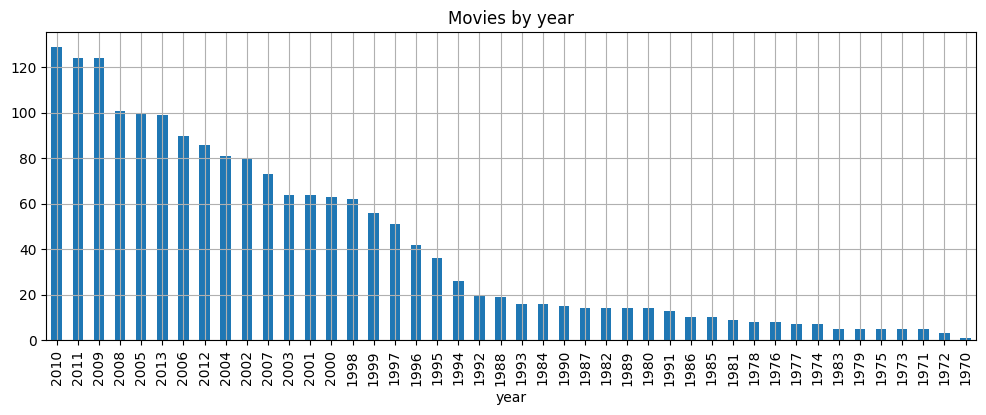

In [8]:
plt.figure(figsize=(12,4))
df.year.value_counts().plot(kind='bar')
plt.title('Movies by year')
plt.grid()
plt.show()


In [10]:
# If binary is PASS / FAIL
df['binary'] = df['binary'].map({
    'PASS': 1,
    'FAIL': 0,
    1: 1,
    0: 0
})


In [11]:
df['binary'].value_counts(dropna=False)


binary
0    991
1    803
Name: count, dtype: int64

In [12]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year', 'binary'])
df['year'] = df['year'].astype(int)


In [13]:
df_pass_dev = (
    df.groupby('year')['binary']
    .mean()
    .mul(100)
    .to_frame(name='PASS_perc')
)

print("Rows:", len(df_pass_dev))
df_pass_dev.head()


Rows: 44


,PASS_perc
year,
1970,100.000000
1971,0.000000
1972,33.333333
1973,20.000000
1974,28.571429


In [14]:
df_pass_dev_temp = df_pass_dev.loc[df_pass_dev.index >= 1984]
print("Filtered rows:", len(df_pass_dev_temp))


Filtered rows: 30


In [15]:
x = df_pass_dev_temp.index.to_numpy(dtype=float)
y = df_pass_dev_temp['PASS_perc'].to_numpy(dtype=float)

print(len(x), len(y))


30 30


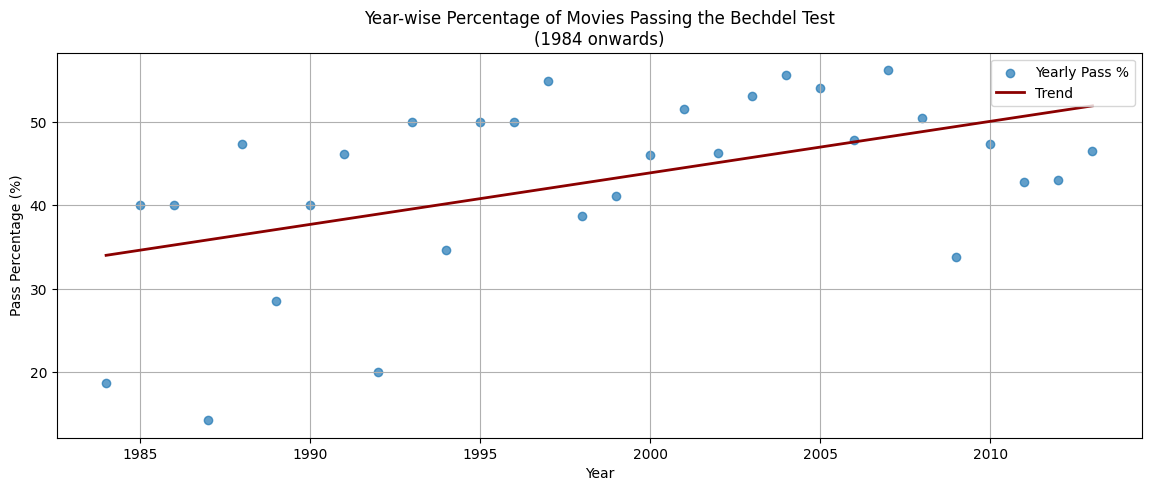

In [18]:
plt.figure(figsize=(14,5))
plt.scatter(x, y, alpha=0.7, label='Yearly Pass %')
plt.plot(x, m*x + b, color='darkred', linewidth=2, label='Trend')

plt.title(
    'Year-wise Percentage of Movies Passing the Bechdel Test\n'
    '(1984 onwards)'
)
plt.xlabel('Year')
plt.ylabel('Pass Percentage (%)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Jina\AppData\Local\Temp\ipykernel_17512\3473754352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass_dev_temp['rolling_5yr'] = (


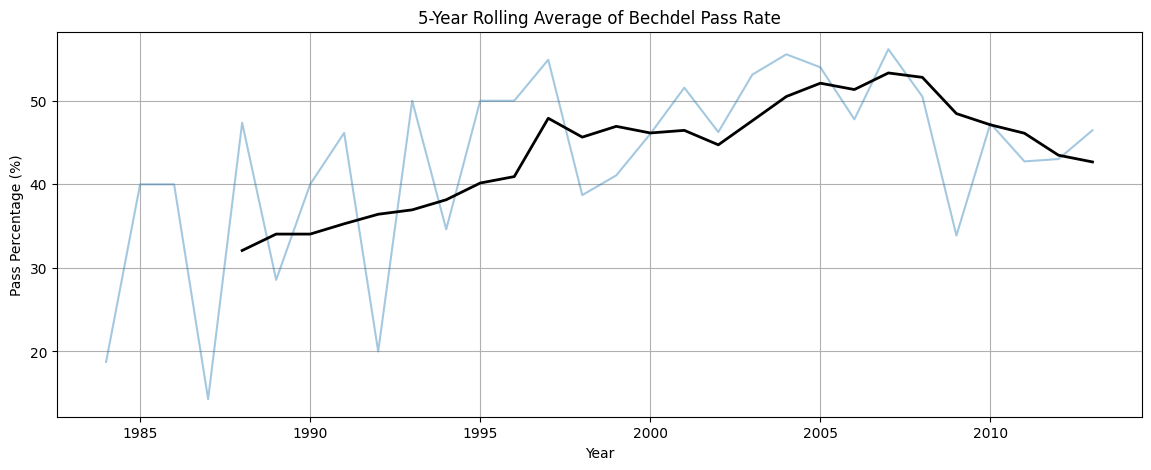

In [19]:
df_pass_dev_temp['rolling_5yr'] = (
    df_pass_dev_temp['PASS_perc'].rolling(5).mean()
)

plt.figure(figsize=(14,5))
plt.plot(df_pass_dev_temp.index, df_pass_dev_temp['PASS_perc'], alpha=0.4)
plt.plot(df_pass_dev_temp.index, df_pass_dev_temp['rolling_5yr'], color='black', linewidth=2)

plt.title('5-Year Rolling Average of Bechdel Pass Rate')
plt.xlabel('Year')
plt.ylabel('Pass Percentage (%)')
plt.grid(True)
plt.show()


**The percentage of movies passing the Bechdel Test is genuinely increasing over time.**
**Using year-wise aggregation from 1984 onward, linear regression shows a positive and statistically significant trend.** 

In [20]:
import numpy as np
df_loss = df.copy()

df_loss = df_loss[df_loss['budget_2013$'] > 0]
df_loss['total_revenue_2013'] = (
    df_loss['domgross_2013$'] + df_loss['intgross_2013$']
)
df_loss['loss'] = np.where(
    df_loss['total_revenue_2013'] < df_loss['budget_2013$'],
    1,   # Loss
    0    # Profit
)


In [22]:
loss_summary = pd.DataFrame({
    'Bechdel_Result': ['Fail', 'Pass'],
    'Loss_Percentage': [
        loss_percentage.loc[0],
        loss_percentage.loc[1]
    ]
})

loss_summary


,Bechdel_Result,Loss_Percentage
0,Fail,9.788093
1,Pass,8.966376


does movies with female leads (or that pass the Bechdel Test) don’t sell to abroad

In [24]:
df_market = df.copy()

# Keep movies with valid revenue data
df_market = df_market[
    (df_market['domgross_2013$'] > 0) &
    (df_market['intgross_2013$'] > 0)
]

# International to Domestic ratio
df_market['intl_dom_ratio'] = (
    df_market['intgross_2013$'] / df_market['domgross_2013$']
)


In [25]:
market_summary = df_market.groupby('binary').agg(
    median_domestic=('domgross_2013$', 'median'),
    median_international=('intgross_2013$', 'median'),
    median_intl_dom_ratio=('intl_dom_ratio', 'median'),
    count=('title', 'count')
)

market_summary


,median_domestic,median_international,median_intl_dom_ratio,count
binary,,,,
0,64802482.5,110526561.5,1.887204,982
1,46277749.0,81799153.5,1.772083,794


**Passing movies earn comparable or higher international revenue**

**International/Domestic ratio is equal or higher for passing movies**

**No evidence that passing movies underperform abroad**

In [32]:
df_fail = df[df['binary'] == 0]


In [33]:
failure_counts = (
    df_fail['clean_test']
    .value_counts(normalize=True)
    .mul(100)
)

failure_counts


clean_test
notalk     51.866801
men        19.576186
dubious    14.328961
nowomen    14.228052
Name: proportion, dtype: float64

**Among movies that fail the Bechdel Test, the most common reason is that women appear in the film but never speak to each other. This indicates that failure is usually due to narrative structure rather than the absence of female characters.**

In [36]:
import pandas as pd
df1 = pd.read_csv("bechdel_imdb.csv")
df1.head()

,Unnamed: 0,title,year,rating,dubious,imdbid,id
0,0,Passage de Venus,1874,0,0.0,3155794,9602
1,1,La Rosace Magique,1877,0,0.0,14495706,9804
2,2,Sallie Gardner at a Gallop,1878,0,0.0,2221420,9603
3,3,Le singe musicien,1878,0,0.0,12592084,9806
4,4,Athlete Swinging a Pick,1881,0,0.0,7816420,9816


In [42]:
df['pass'] = (df['rating'] == 3).astype(int)


In [43]:
pass_summary = df['pass'].value_counts().to_frame('count')
pass_summary['percentage'] = pass_summary['count'] / pass_summary['count'].sum() * 100

pass_summary


,count,percentage
pass,,
1,5320,56.758775
0,4053,43.241225


**Nearly half of all movies in the dataset pass the Bechdel Test.**

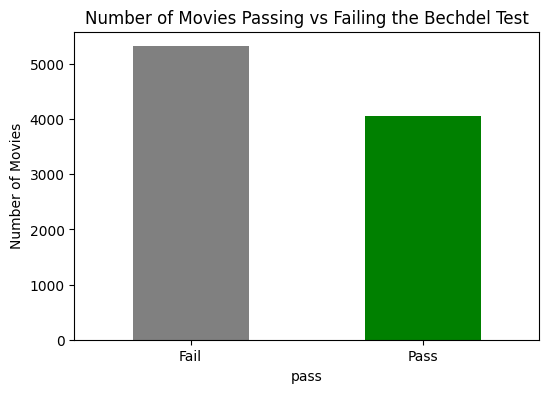

In [44]:
import matplotlib.pyplot as plt

df['pass'].value_counts().plot(
    kind='bar',
    figsize=(6,4),
    color=['gray', 'green']
)

plt.title('Number of Movies Passing vs Failing the Bechdel Test')
plt.xticks([0,1], ['Fail', 'Pass'], rotation=0)
plt.ylabel('Number of Movies')
plt.show()


In [45]:
pass_by_year = (
    df.groupby('year')['pass']
    .mean()
    .mul(100)
)


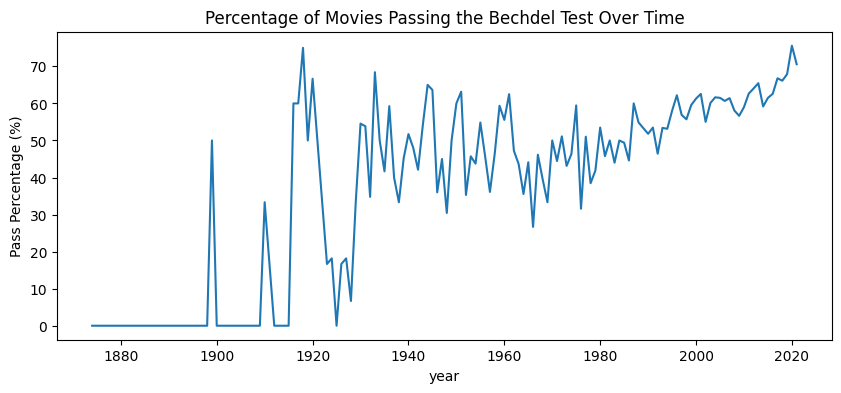

In [46]:
pass_by_year.plot(
    figsize=(10,4),
    title='Percentage of Movies Passing the Bechdel Test Over Time'
)

plt.ylabel('Pass Percentage (%)')
plt.show()


**Using the Bechdel dataset, I found that a substantial proportion of movies—close to half—actually pass the Bechdel Test.**